In [4]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [55]:
#Load data & print samples
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 Exploratory Data Analysis


In [8]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


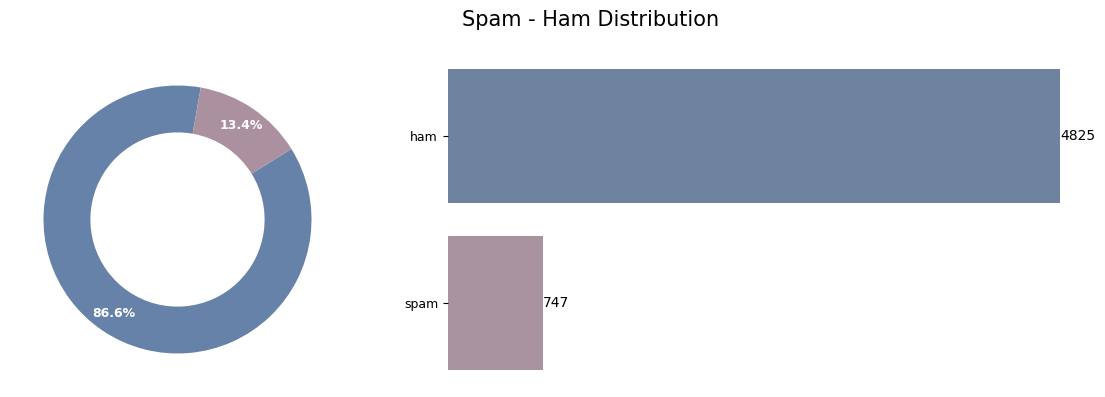

In [9]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Ham Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [10]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


The dataset has 4825 emails (86.6%) labled as Ham while 747 (13.4%) labaled as Spam.

"ham" is the predominant category.

The dataset contains 5,169 unique texts.

The most frequent text being "Sorry, I'll call later," occurring 30 times.


In [11]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

Word Cloud : Spam vs Ham

Saving spam.png to spam (3).png


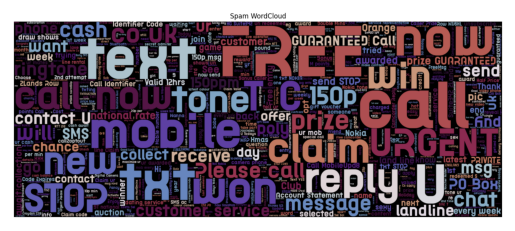

In [13]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload image file from local device
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the image using matplotlib
img = mpimg.imread(filename)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


Saving ham.png to ham.png


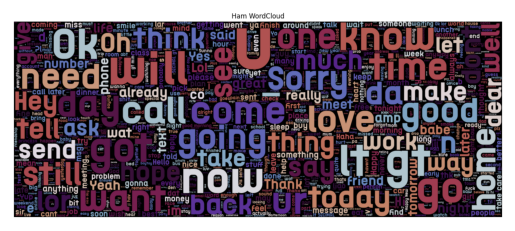

In [14]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload image file from local device
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the image using matplotlib
img = mpimg.imread(filename)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

5 ways to identify a spam email

Saving Screenshot 2024-04-19 232508.png to Screenshot 2024-04-19 232508.png


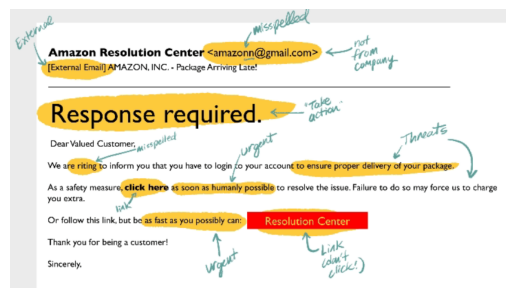

In [54]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload image file from local device
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the image using matplotlib
img = mpimg.imread(filename)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

 Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [17]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

# Training the ML models

Neural network

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(mlp_classifier_model.classes_)

In [19]:
# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction, pos_label="spam")))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction, pos_label="spam")))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction, pos_label="spam")))

MLP Classifier
Accuracy score: 0.98
Precision score: 0.98
Recall score: 0.90
F1 score: 0.94


Multinomial Naive Bayes

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(y_test.value_counts())

In [23]:
# Change pos_label to 'ham'
print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction, pos_label='ham')) )
print("Recall score: {}". format(recall_score(y_test, prediction, pos_label='ham')))
print("F1 score: {}". format(f1_score(y_test, prediction, pos_label='ham')))

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9910591471801926
Recall score: 0.9876627827278959
F1 score: 0.989358050120151


Bernoulli Naive Bayes

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("F1 score: {}". format(f1_score(y_test, prediction, pos_label="ham")))

In [31]:
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction, pos_label="ham")) )
print("Recall score: {}". format(recall_score(y_test, prediction, pos_label="ham")))
print("F1 score: {}". format(f1_score(y_test, prediction, pos_label="ham")))

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 0.9818304172274562
Recall score: 1.0
F1 score: 0.9908319185059423


Confusion Matrix

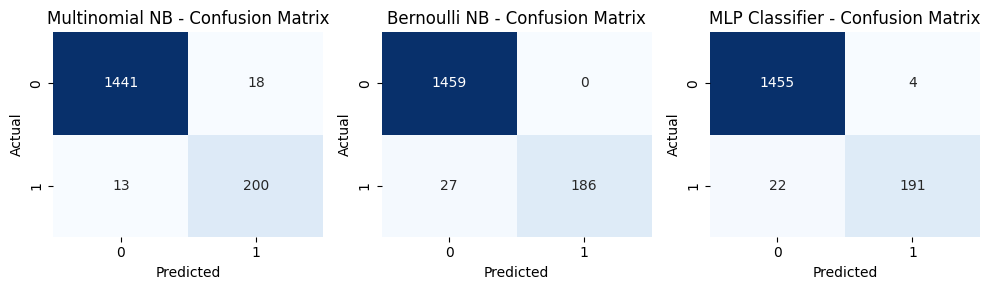

In [32]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

 Metric Comparison Heatmap

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Convert 'ham' and 'spam' labels to binary format for metrics calculation
y_test_binary = [1 if label == 'ham' else 0 for label in y_test]
prediction_binary = [1 if label == 'ham' else 0 for label in prediction]

# Compute precision, recall, F1 score, and accuracy
precision = precision_score(y_test_binary, prediction_binary)
recall = recall_score(y_test_binary, prediction_binary)
f1 = f1_score(y_test_binary, prediction_binary)
accuracy = accuracy_score(y_test_binary, prediction_binary)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test_binary, prediction_binary, target_names=['spam', 'ham']))


Precision: 0.9911
Recall: 0.9877
F1 Score: 0.9894
Accuracy: 0.9815

Classification Report:
              precision    recall  f1-score   support

        spam       0.92      0.94      0.93       213
         ham       0.99      0.99      0.99      1459

    accuracy                           0.98      1672
   macro avg       0.95      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_prediction = mnb.predict(x_test)

mnb_accuracy = accuracy_score(y_test, mnb_prediction)
mnb_precision = precision_score(y_test, mnb_prediction, average='weighted')
mnb_recall = recall_score(y_test, mnb_prediction, average='weighted')
mnb_f1 = f1_score(y_test, mnb_prediction, average='weighted')

print("Multinomial Naive Bayes Metrics:")
print(f'Accuracy: {mnb_accuracy:.4f}')
print(f'Precision: {mnb_precision:.4f}')
print(f'Recall: {mnb_recall:.4f}')
print(f'F1 Score: {mnb_f1:.4f}')

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_prediction = bnb.predict(x_test)

bnb_accuracy = accuracy_score(y_test, bnb_prediction)
bnb_precision = precision_score(y_test, bnb_prediction, average='weighted')
bnb_recall = recall_score(y_test, bnb_prediction, average='weighted')
bnb_f1 = f1_score(y_test, bnb_prediction, average='weighted')

print("\nBernoulli Naive Bayes Metrics:")
print(f'Accuracy: {bnb_accuracy:.4f}')
print(f'Precision: {bnb_precision:.4f}')
print(f'Recall: {bnb_recall:.4f}')
print(f'F1 Score: {bnb_f1:.4f}')

# MLP Classifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_prediction = mlp.predict(x_test)

# Convert 'ham' and 'spam' labels to binary format for MLP Classifier
y_test_binary = [1 if label == 'ham' else 0 for label in y_test]
mlp_prediction_binary = [1 if label == 'ham' else 0 for label in mlp_prediction]

mlp_accuracy = accuracy_score(y_test_binary, mlp_prediction_binary)
mlp_precision = precision_score(y_test_binary, mlp_prediction_binary)
mlp_recall = recall_score(y_test_binary, mlp_prediction_binary)
mlp_f1 = f1_score(y_test_binary, mlp_prediction_binary)

print("\nMLP Classifier Metrics:")
print(f'Accuracy: {mlp_accuracy:.4f}')
print(f'Precision: {mlp_precision:.4f}')
print(f'Recall: {mlp_recall:.4f}')
print(f'F1 Score: {mlp_f1:.4f}')


Multinomial Naive Bayes Metrics:
Accuracy: 0.9815
Precision: 0.9817
Recall: 0.9815
F1 Score: 0.9816

Bernoulli Naive Bayes Metrics:
Accuracy: 0.9839
Precision: 0.9841
Recall: 0.9839
F1 Score: 0.9834

MLP Classifier Metrics:
Accuracy: 0.9839
Precision: 0.9844
Recall: 0.9973
F1 Score: 0.9908


## conclusion



*  All three models perform exceptionally well,with high accuracy scores

*  All three models perform exceptionally well,with high accuracy scores.
*  MLP Classifier leads in accuracy of 99%, followed by Bernoulli NB (98.39%), and Multinomial NB (98.15%)

*  Bernoulli NB achieves perfect precision (100%), indicating it has predicated correctly all the time.
* MLP Classifier excels in F1 score of 94%  

*  MLP Classifier has slightly lower recall 90% but compensates with higher precision.
  







In [ ]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()